# Happiness influenced by income. Paunoiu Darius Alexandru ISI 2024

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Maximum GDP: 125006.021815486 (Country: Luxembourg)
Maximum GDP: 259.025031363088 (Country: Burundi)
        Rank_2022            GDP
count  126.000000     126.000000
mean    72.904762   18047.894032
std     43.499228   24973.023674
min      1.000000     259.025031
25%     36.250000    2115.132359
50%     70.500000    6861.582423
75%    111.750000   23763.549395
max    146.000000  125006.021815


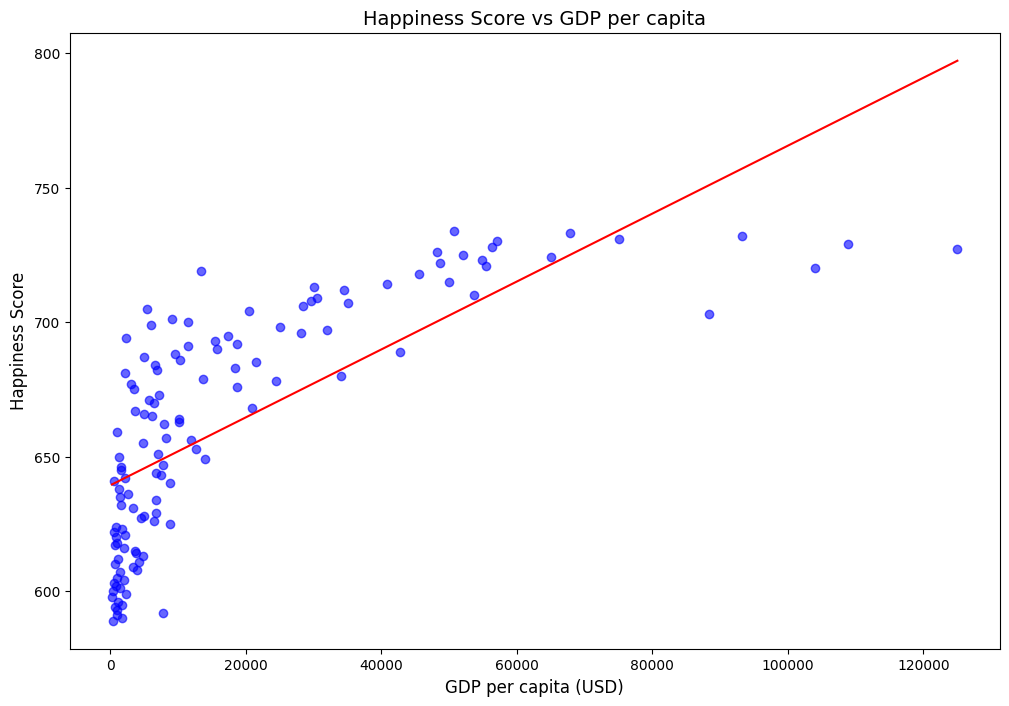

In [88]:
# Dataset links
# https://www.kaggle.com/datasets/anas123siddiqui/happiness-index-data
# https://data.worldbank.org/indicator/NY.GDP.PCAP.CD?end=2020
path_happiness = 'happiness_dataset.csv'
path_gdp = 'gdp.csv'
df_happiness = pd.read_csv(path_happiness)
df_gdp = pd.read_csv(path_gdp)

df_happiness = df_happiness[['Country or region', 'Rank_2022']]
df_happiness.rename({"Country or region": "Country"}, axis='columns', inplace=True)


df_gdp = df_gdp[['Country Name', '2022']]
df_gdp.rename({"Country Name": "Country", "2022": "GDP"}, axis='columns', inplace=True)

df = pd.merge(df_happiness, df_gdp)

# Remove rows with NaN values
df = df.dropna()

# Remove rows with infinity values
df = df[~df.isin([np.inf, -np.inf]).any(axis=1)]

# Remove rows with zero values
df = df[(df != 0).all(axis=1)]

max_income_country = df.loc[df['GDP'].idxmax()]['Country']
print(f"Maximum GDP: {df['GDP'].max()} (Country: {max_income_country})")

min_income_country = df.loc[df['GDP'].idxmin()]['Country']
print(f"Maximum GDP: {df['GDP'].min()} (Country: {min_income_country})")

df = df[['Rank_2022', 'GDP']]

print(df.describe())
val_max = max(df['Rank_2022']) + 1
df['Rank_2022'] = val_max * 5 - df['Rank_2022']


plt.figure(figsize=(12, 8))
plt.scatter(df['GDP'], df['Rank_2022'], color='b', alpha=0.6)

# Create a linear regression estimation
estimation = np.polyfit(df['GDP'], df['Rank_2022'], 1)
estimation_curve = np.poly1d(estimation)

x_values = np.linspace(min(df['GDP']), max(df['GDP']), 100)
y_values = estimation_curve(x_values)

# Plot estimation
plt.plot(x_values, y_values, color='r', label='Polynomial Fit (Degree 3)')

# Adding labels and title
plt.title('Happiness Score vs GDP per capita', fontsize=14)
plt.xlabel('GDP per capita (USD)', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)

plt.savefig('grafic.png', dpi=300)
plt.show()